In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins

%matplotlib inline
plt.style.use('seaborn-white')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression



In [5]:
# Replace the path with the correct path for your data.
df = pd.read_csv('/Users/mille/Desktop/Supervised learning potpourri/creditcard.csv')

In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

## ***Background on dataset: ***

https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

**Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Inspiration**

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## ***Plan for working with data and modeling***

Correlation matrix - exploratory analysis 
1. Random Forest 
2. Logistic Regression
3. SVM 


Working on Normalizing credit card dataset: https://www.kaggle.com/gargmanish/how-to-handle-imbalance-data-study-in-detail

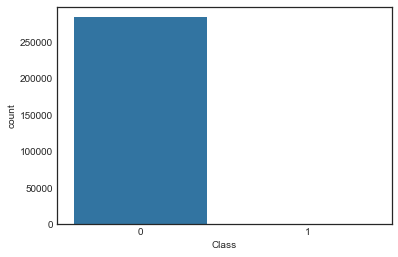

In [8]:
sns.countplot("Class",data=df)


In [9]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [10]:
# now let us check in the number of Percentage
Count_Normal_transacation = len(df[df["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(df[df["Class"]==1]) # fraud by 1

Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)

Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


There is only a 0.17% of fraudulent transactions in credit cards. Meaning there is also 99.8% of valid transactions as well.

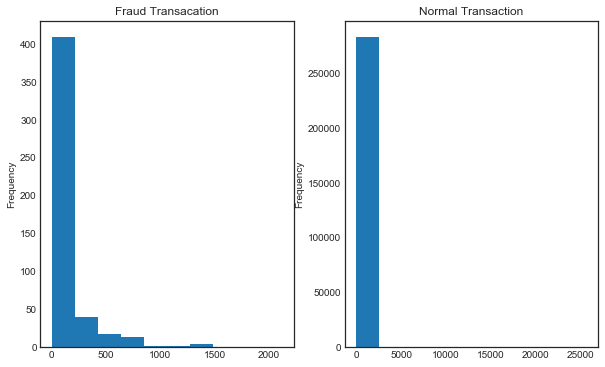

In [11]:
Fraud_transacation = df[df["Class"]==1]
Normal_transacation= df[df["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

In [12]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# count fraud transaction is the total number of fraud transaction
# now lets us see the index of fraud cases

fraud_indices= np.array(df[df.Class==1].index)
normal_indices = np.array(df[df.Class==0].index)

#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
def undersample(normal_indices,fraud_indices,times):#times denote the normal data = times*fraud data
    
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data[undersample_data.Class]))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data[undersample_data.Class]))
    print("total number of record in resampled data is:",len(undersample_data[undersample_data.Class]))
    return(undersample_data)

In [13]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

In [14]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.ix[:,x.columns != "Class"]
    x_labels=x.ix[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [16]:
from sklearn.preprocessing import StandardScaler 

In [19]:
# before starting we should standridze our ampount column
df["Normalized Amount"] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(["Time","Amount"],axis=1,inplace=True)
df.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### ***Assigning train data***

In [21]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_train = df.iloc[:trainsize, :].copy()
df_test = df.iloc[trainsize:, :].copy()

In [22]:

data_train = df_train.drop(['Class'],1)
target_train = df_train.Class

data_test = df_test.drop(['Class'],1)
target_test = df_test.Class

## ***Random Forest***

In [23]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, data_train, target_train, cv=10)

C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: T

array([0.95519978, 0.9989467 , 0.99845516, 0.99943824, 0.99978933,
       0.9994382 , 0.99957865, 0.9994382 , 0.99929775, 0.99915724])

In [10]:
rfc.fit(data_train, target_train)


C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
# Classify, storing the result in a new variable.
y_pred_test2= rfc.predict(data_test)
y_pred_train2 = rfc.predict(data_train)

In [12]:
# Display our results.
print("Train: Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != y_pred_train2).sum()
))
print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != y_pred_test2).sum()
))

Train: Number of mislabeled points out of a total 142403 points : 13
Test: Number of mislabeled points out of a total 142404 points : 120


In [13]:
pd.crosstab(target_train, y_pred_train2)

# 13/269 = 4.8% error fraud 

col_0,0,1
Class,,
0,142134,0
1,13,256


### **Random Forest - fraud detection percentage of 4.8 % **

## ***Logistic Regression***

In [14]:
# Declare predictors.
X_statsmod = df[['Time', 'Amount']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(df['Class'], X_statsmod)
result = logit.fit()
#clear values 0 or 1 

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Optimization terminated successfully.
         Current function value: 0.012630
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284804
Method:                           MLE   Df Model:                            2
Date:                Sun, 24 Mar 2019   Pseudo R-squ.:                0.006627
Time:                        22:23:07   Log-Likelihood:                -3597.2
converged:                       True   LL-Null:                       -3621.2
                                        LLR p-value:                 3.778e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -6.337e-06   9.73e-07     -6.515      0.000   -8.24e-06   -4.43e-06
Amount         0.0002   6.81

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
predictions = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.65      0.48      0.55       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.83      0.74      0.77     93987
weighted avg       1.00      1.00      1.00     93987



In [22]:
# Declare a lasso regression classifier.
lasso_reg = LogisticRegression(penalty='l1', C=20)

# Fit the model.
lasso_fit = lasso_reg.fit(X, y)

# Display.
print('Coefficients')
print(lasso_fit.coef_)
print(lasso_fit.intercept_)
pred_y_sklearn = lasso_reg.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lasso_reg.score(X, y))

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients
[[-4.19618343e-06  8.96295488e-02  1.75838137e-03 -2.24648355e-02
   6.94937311e-01  1.27089327e-01 -1.14701463e-01 -7.49020127e-02
  -1.80013386e-01 -2.79981599e-01 -8.05510722e-01 -6.73780020e-02
   9.05095174e-02 -3.31751921e-01 -5.60413595e-01 -1.18523162e-01
  -1.93509053e-01 -2.89708239e-02 -6.21459618e-03  9.53632081e-02
  -4.30467133e-01  3.93701139e-01  6.33324215e-01 -1.02336553e-01
   1.28961399e-01 -8.42305585e-02  2.23620530e-02 -7.87257412e-01
  -2.82082304e-01  7.75625487e-04]]
[-8.32384054]

 Accuracy by admission status
Class       0    1
row_0             
0      284273  184
1          42  308

 Percentage accuracy
0.9992064801778047


Lasso - logistic regression has a 12% fraud detection rate. 

In [23]:
lasso_scores = cross_val_score(lasso_reg, X, y, cv=10)
print(lasso_scores)

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

[0.99866582 0.99887648 0.999684   0.99898178 0.99884133 0.99912219
 0.99961376 0.99908708 0.99922753 0.99901685]


In [24]:
# Mean accuracy has improved slightly with penalty='l1' and C set to 20
avg_lasso = np.mean(lasso_scores)
print(np.mean(avg_lasso))

0.9991116833155729


In [25]:
# Declare a ridge regression classifier.
ridge_reg = LogisticRegression(penalty='l2', C=20)

# Fit the model.
ridge_fit = ridge_reg.fit(X, y)

# Display.
print('Coefficients')
print(ridge_fit.coef_)
print(ridge_fit.intercept_)
pred_y_sklearn = ridge_reg.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(ridge_reg.score(X, y))

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients
[[-7.12203088e-05  3.18987791e-01 -4.84114993e-01 -7.93492991e-01
   1.20293220e-01  5.74913980e-02 -5.40507839e-02  3.35304942e-01
  -3.74343608e-01 -3.88595044e-01 -2.07045204e-01 -2.86734729e-01
   1.86401142e-02 -3.06663722e-01 -6.94601310e-01 -4.27792172e-01
  -2.94733914e-01 -4.39973718e-01  3.10696173e-02  2.65173298e-02
   9.20001779e-02  2.48882503e-01  3.51023984e-01  6.77165121e-02
  -2.44433495e-02 -3.56180828e-01  6.07203156e-02 -8.88546940e-02
   2.77990891e-02 -5.58260923e-03]]
[-1.62882168]

 Accuracy by admission status
Class       0    1
row_0             
0      284240  203
1          75  289

 Percentage accuracy
0.9990239003957065


Ridge - logistic regression produced a detection fraud percent of 20%. 

In [26]:
X = np.array(df.ix[:, df.columns != 'Class'])
y = np.array(df.ix[:, df.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 30)
Shape of y: (284807, 1)


C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## SVM 

In [24]:
from sklearn.svm import SVC


In [25]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

y_train = df_train['Class'].values.reshape(-1,1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['Class'])]

Y_test = df_test['Class'].values.reshape(-1,1)
X_test = df_test.loc[:, ~(df_train.columns).isin(['Class'])]

In [26]:
svm = SVC()
svm.fit(data_train, target_train)

C:\Users\mille\Conda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred_train4 = svm.predict(data_train)
y_pred_test4 = svm.predict(data_test)

In [28]:
pd.crosstab(target_train, y_pred_train4)
#Training data 15.2% fraud detection percentage

col_0,0,1
Class,,
0,142129,5
1,41,228


In [29]:
pd.crosstab(target_test, y_pred_test4)
#Testing data 60.0% fraud detection percentage 

col_0,0,1
Class,,
0,142136,45
1,134,89


#### The SVM test showed poor results with regarding the fraud detection.

## Gradient Boost

In [34]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(data_train, target_train)

y_pred_train5 = clf.predict(data_train)
y_pred_test5 = clf.predict(data_test)

In [35]:
table_train = pd.crosstab(target_train, y_pred_train5, margins = True )
print(table_train)

col_0       0    1     All
Class                     
0      142111   23  142134
1          87  182     269
All    142198  205  142403


The training data predicted fraud detection at 32%. 

In [36]:
table_test = pd.crosstab(target_test, y_pred_test5, margins = True )
print(table_test)

col_0       0    1     All
Class                     
0      142150   31  142181
1         106  117     223
All    142256  148  142404


The test data predicted a fraud detection at 47% which is really bad. 

In [37]:

train_tI_errors = table_train.loc[0,1] / table_train.loc['All','All'] 
train_tII_errors = table_train.loc[1,0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0,1]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1,0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0001615134512615605
Percent Type II errors: 0.0006109421852067723

Test set accuracy:
Percent Type I errors: 0.00021769051431139576
Percent Type II errors: 0.0007443611134518693
